In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json

In [2]:
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

# Incidence

In [3]:
eps_prism = 11.5

payload = json.dumps({
    "ScenarioData": {
    "type": "Incident",
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 90,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

x_axis = np.round(np.degrees(structure.incident_angle), 1)
frequency = structure.frequency

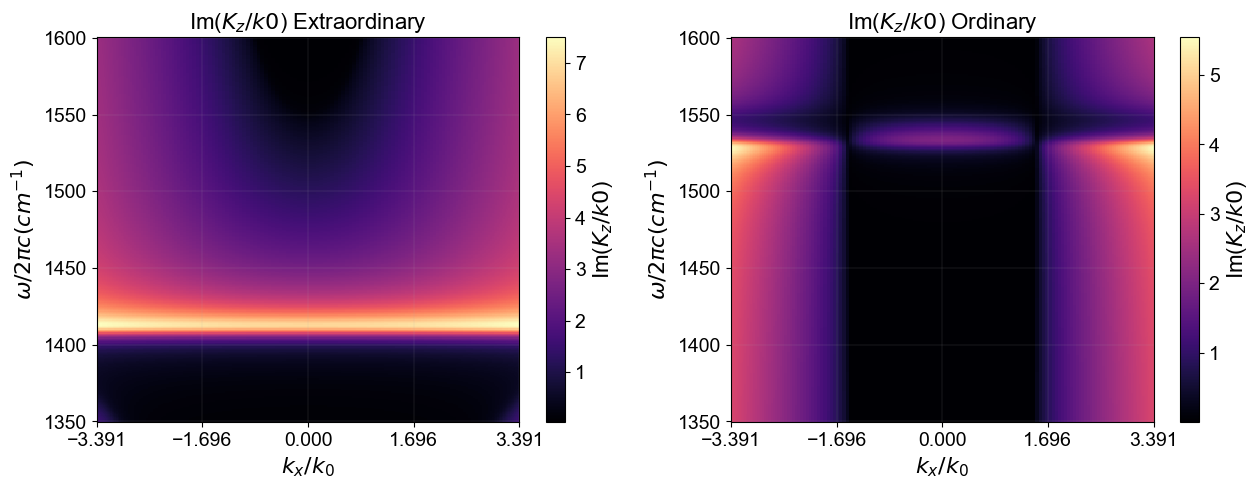

In [4]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Extraordinary')
axs[1].set_title(f'Im($K_z/k0$) Ordinary')


plt.show()

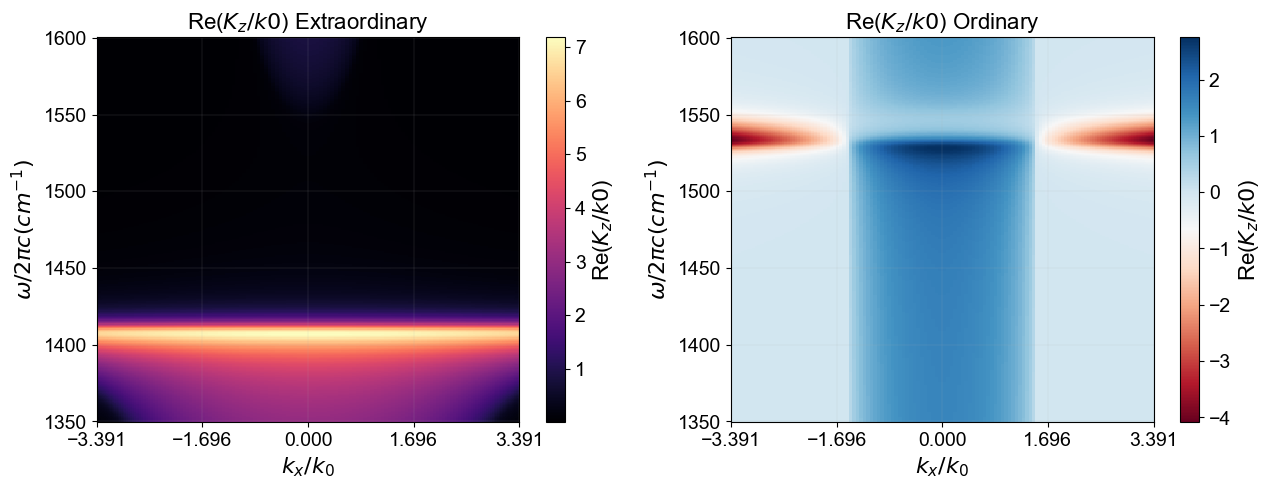

In [5]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Extraordinary')
axs[1].set_title(f'Re($K_z/k0$) Ordinary')


plt.show()

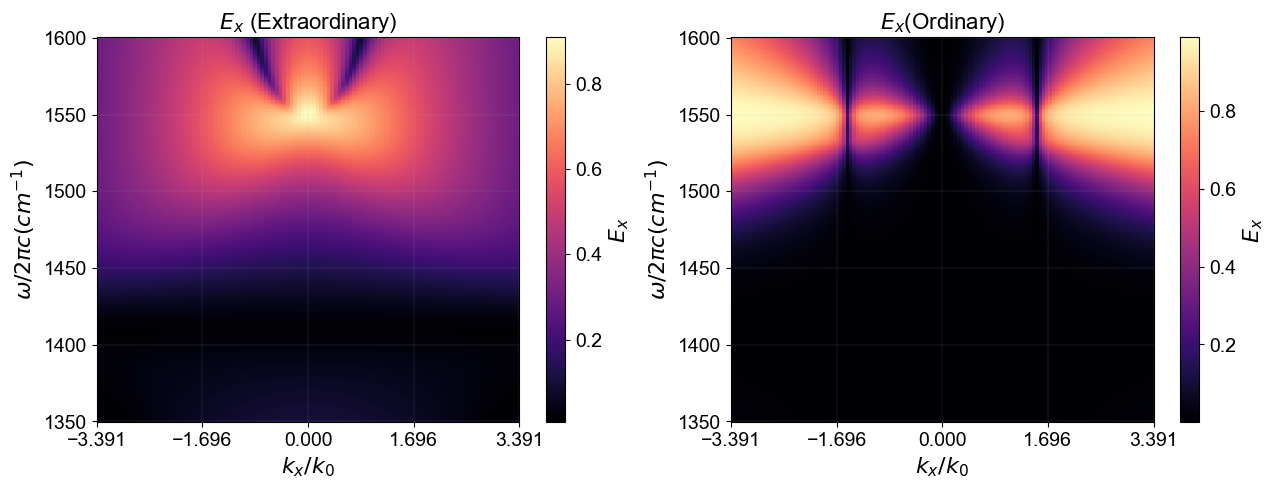

In [6]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Extraordinary)')
axs[1].set_title(f'$E_x$(Ordinary)')


plt.show()

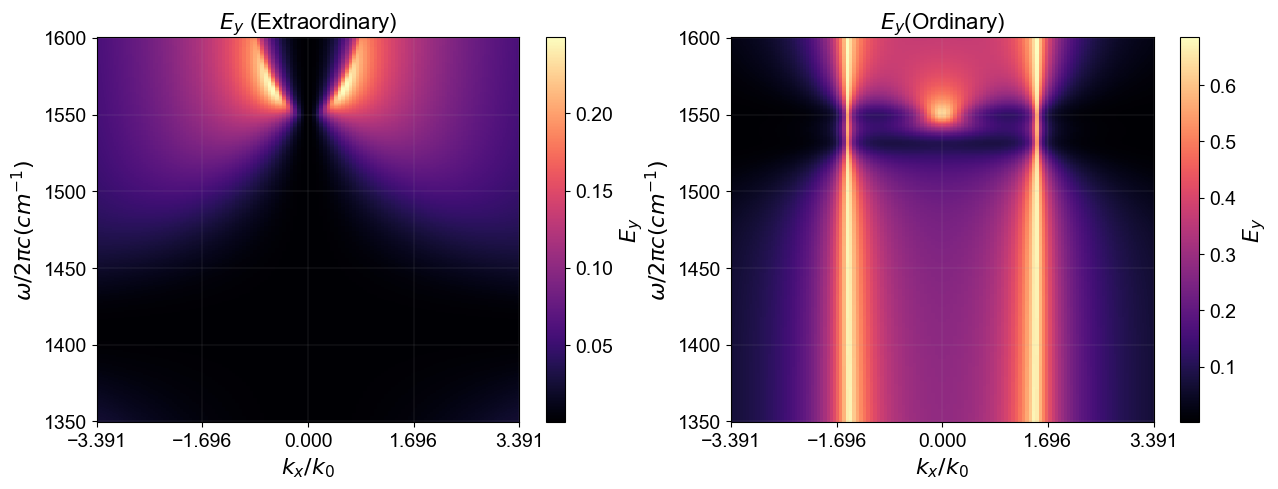

In [7]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ (Extraordinary)')
axs[1].set_title(f'$E_y$(Ordinary)')


plt.show()

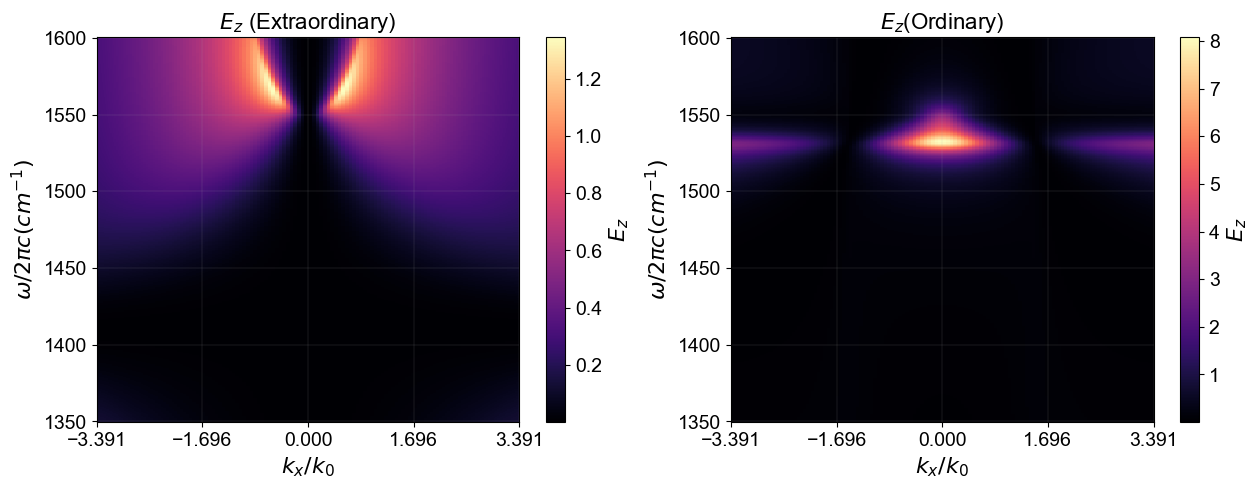

In [8]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ (Extraordinary)')
axs[1].set_title(f'$E_z$(Ordinary)')


plt.show()

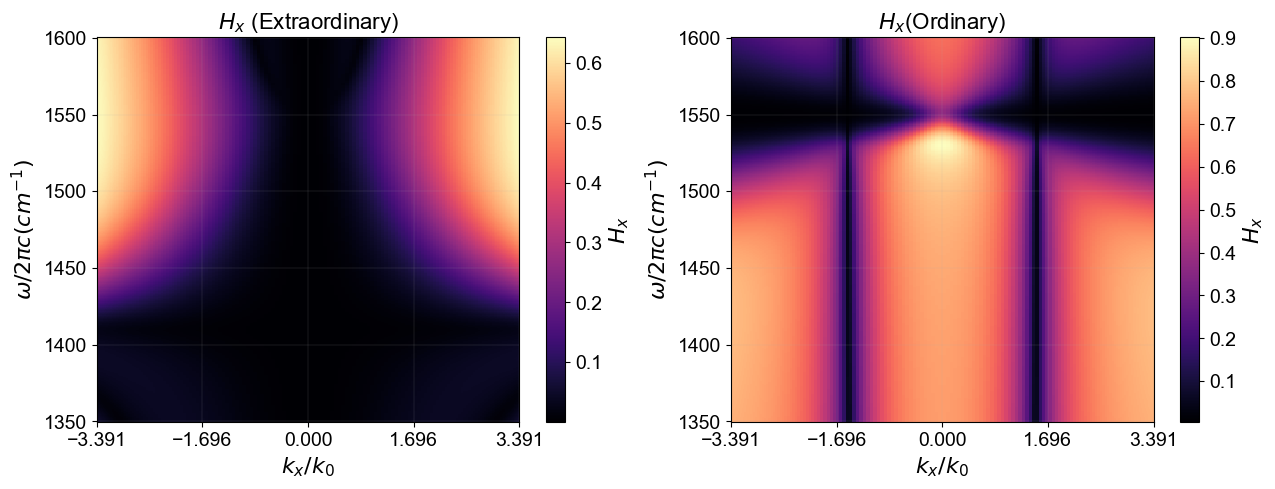

In [9]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ (Extraordinary)')
axs[1].set_title(f'$H_x$(Ordinary)')


plt.show()

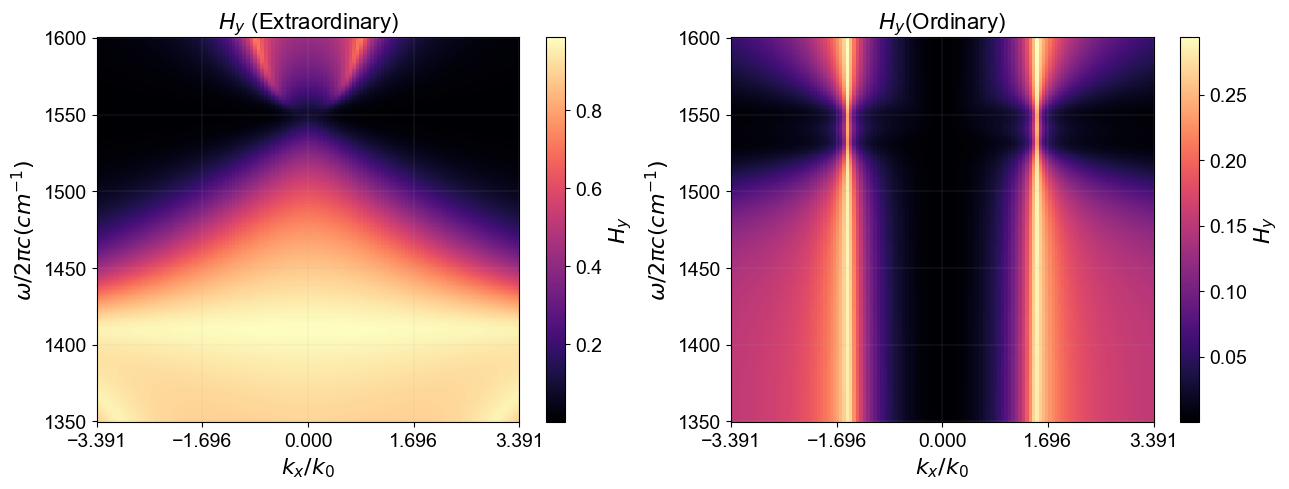

In [10]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ (Extraordinary)')
axs[1].set_title(f'$H_y$(Ordinary)')


plt.show()

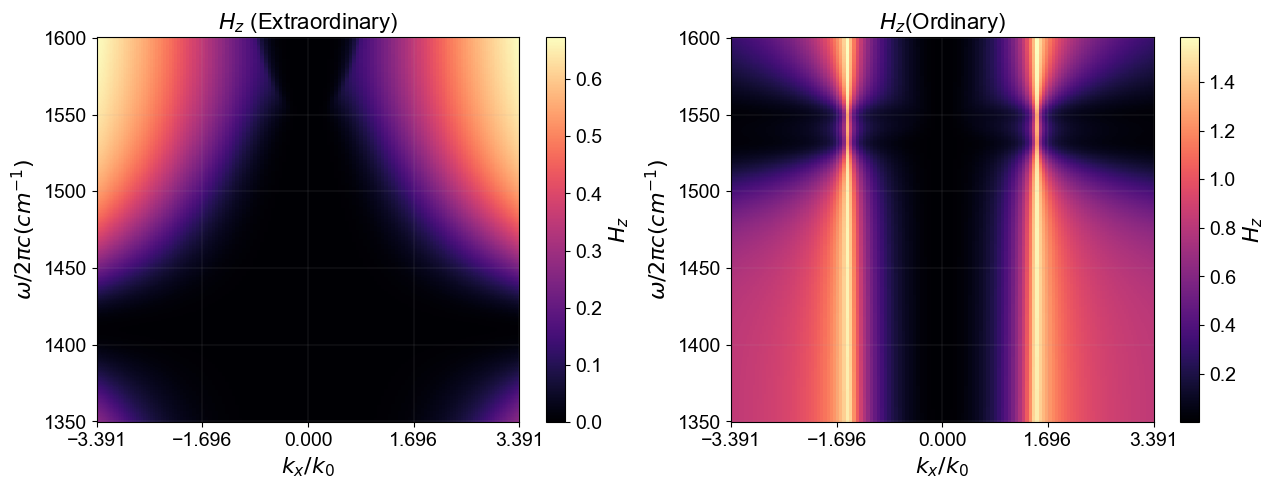

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ (Extraordinary)')
axs[1].set_title(f'$H_z$(Ordinary)')


plt.show()

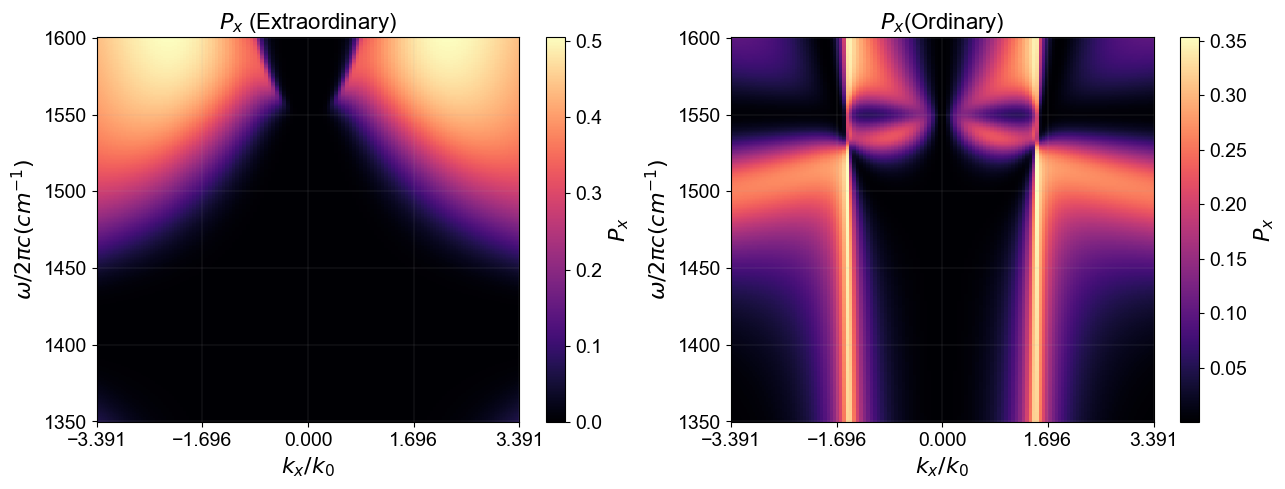

In [12]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ (Extraordinary)')
axs[1].set_title(f'$P_x$(Ordinary)')


plt.show()

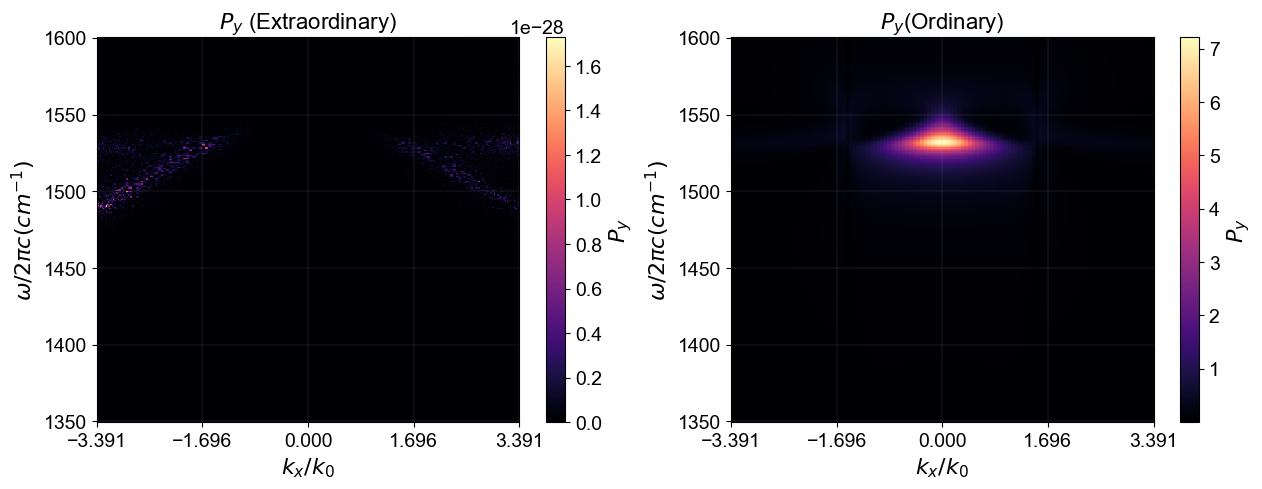

In [13]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ (Extraordinary)')
axs[1].set_title(f'$P_y$(Ordinary)')


plt.show()

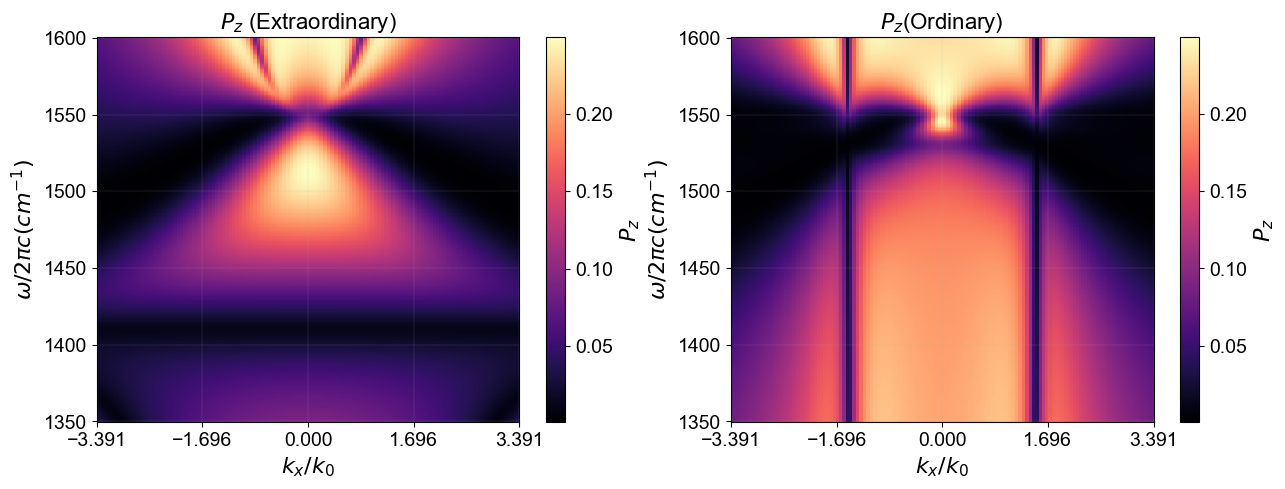

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ (Extraordinary)')
axs[1].set_title(f'$P_z$(Ordinary)')


plt.show()

# Azimuthal Rotation

In [15]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Azimuthal",
    "incidentAngle": 21,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 11.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [16]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

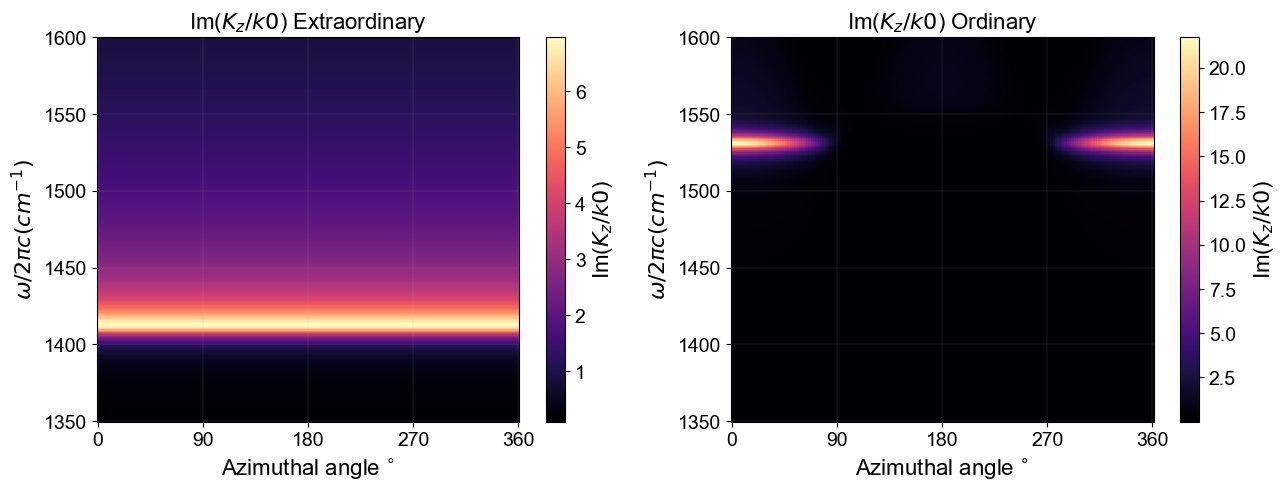

In [17]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Extraordinary')
axs[1].set_title(f'Im($K_z/k0$) Ordinary')


plt.show()

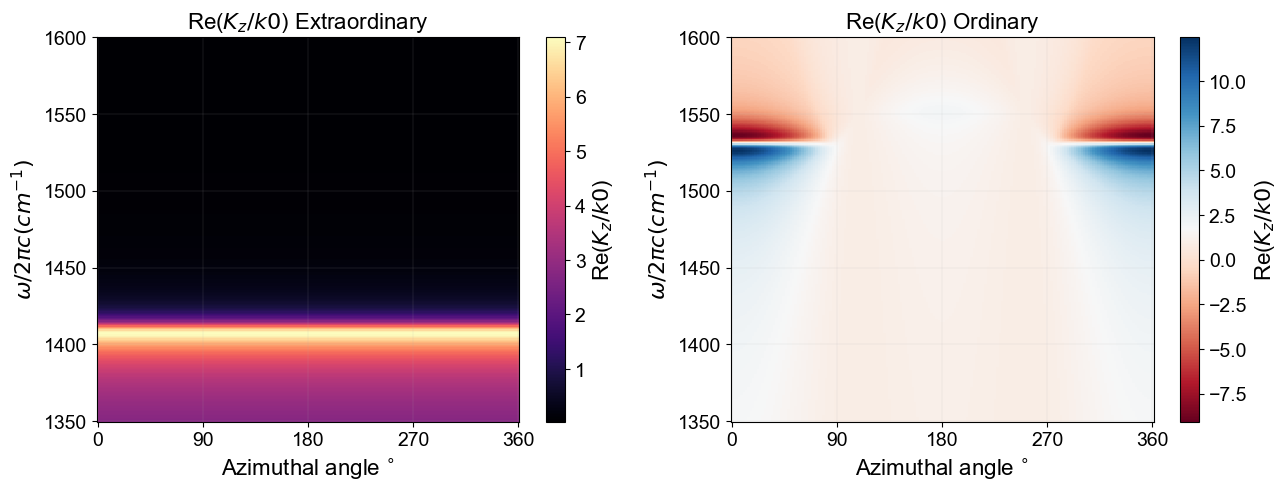

In [18]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Extraordinary')
axs[1].set_title(f'Re($K_z/k0$) Ordinary')


plt.show()

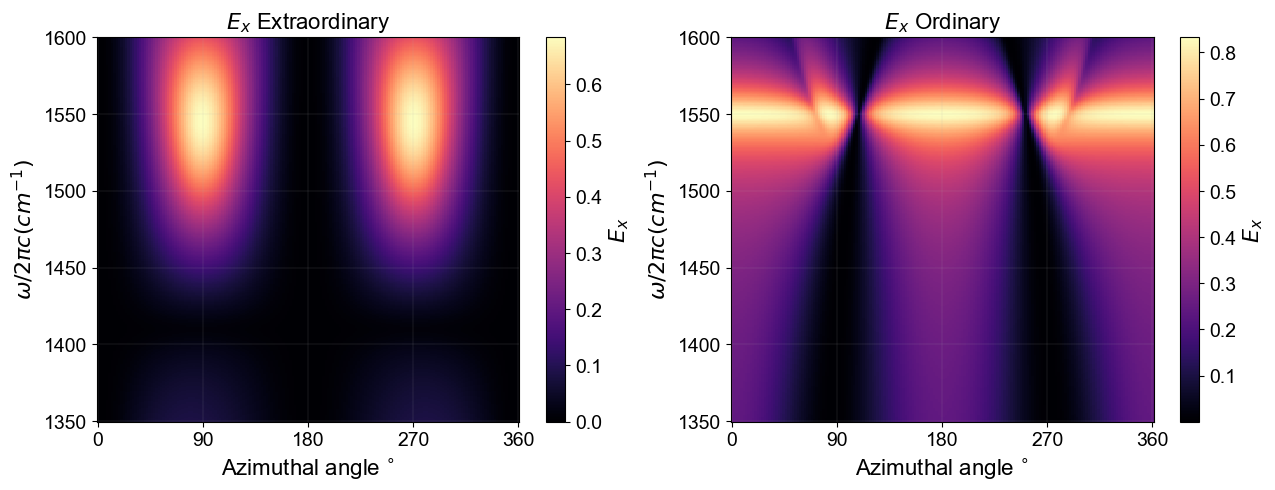

In [19]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ Extraordinary')
axs[1].set_title(f'$E_x$ Ordinary')


plt.show()

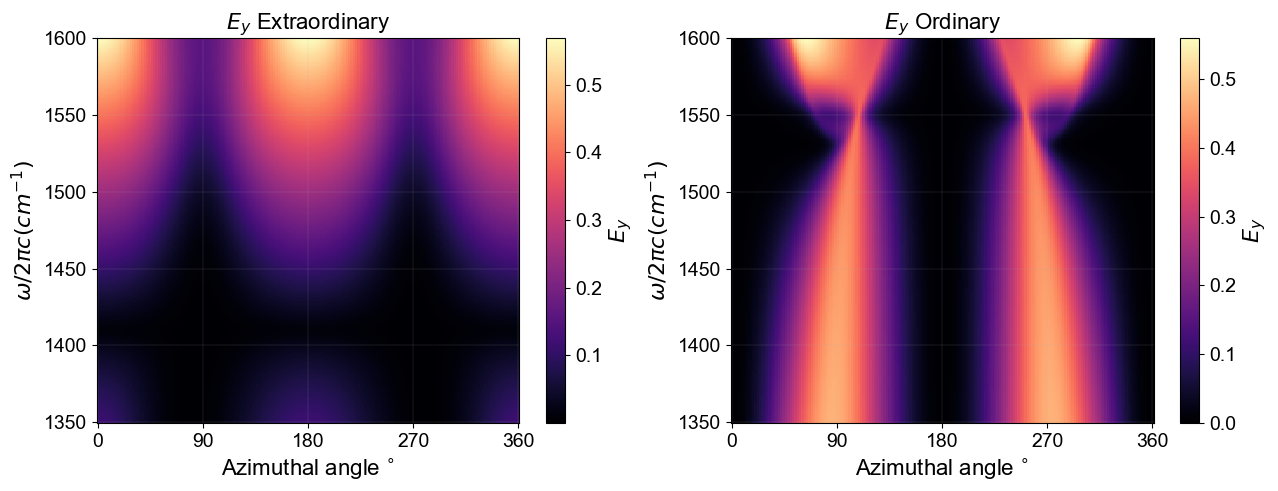

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ Extraordinary')
axs[1].set_title(f'$E_y$ Ordinary')


plt.show()

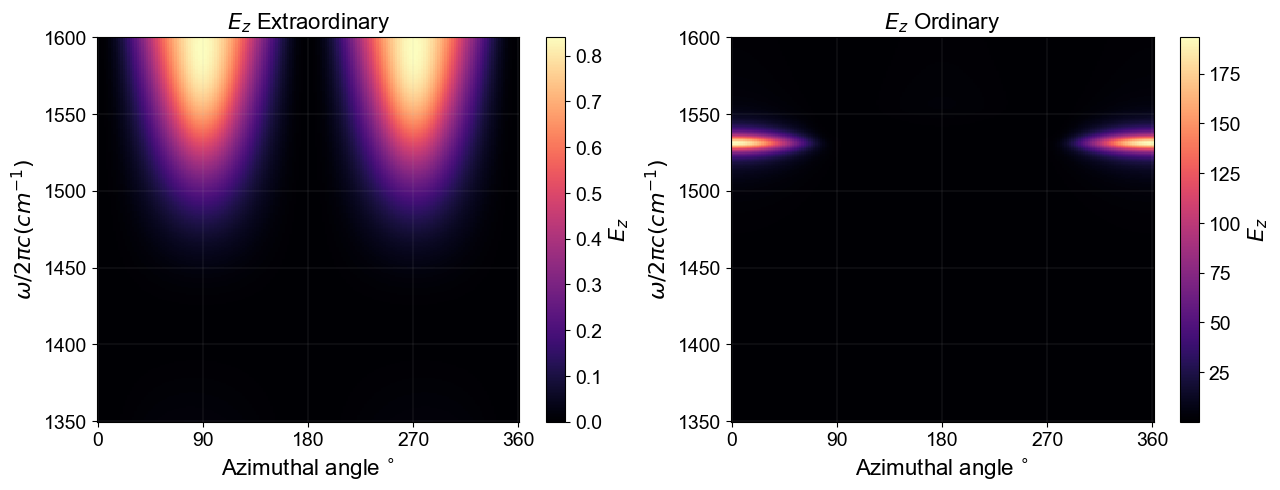

In [21]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ Extraordinary')
axs[1].set_title(f'$E_z$ Ordinary')


plt.show()

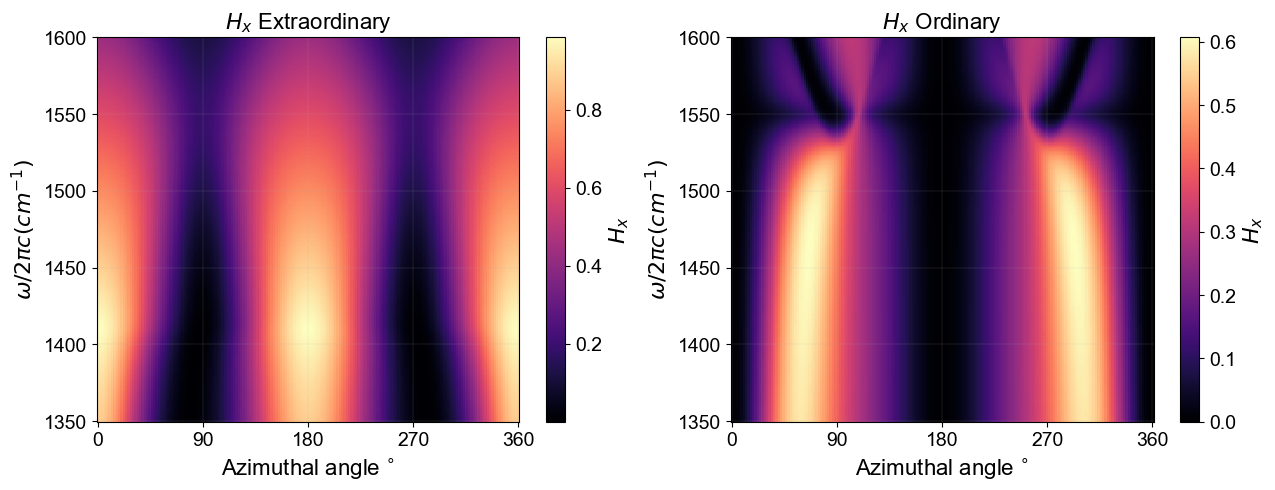

In [22]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ Extraordinary')
axs[1].set_title(f'$H_x$ Ordinary')


plt.show()

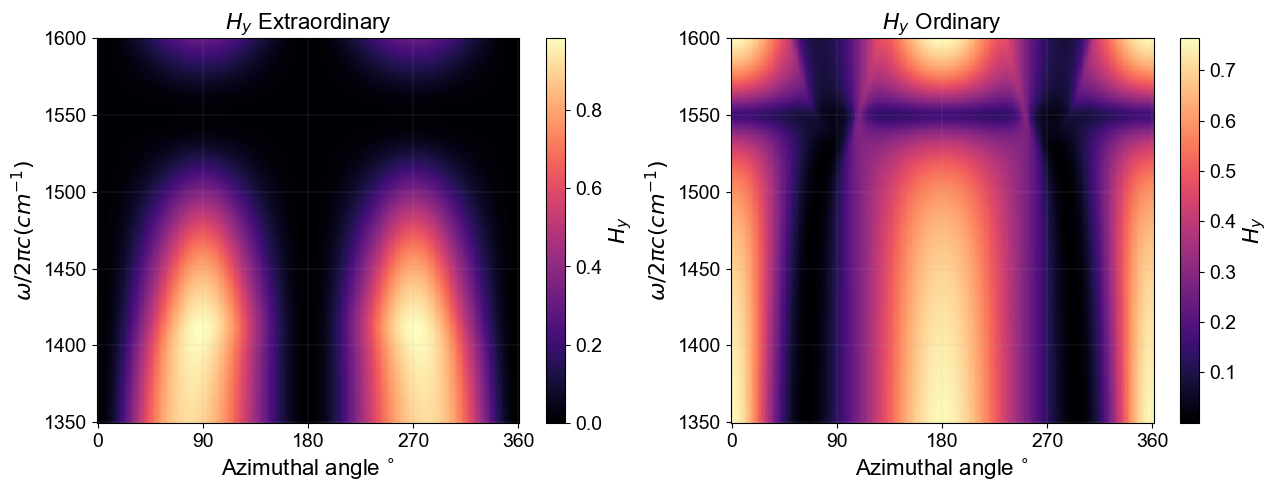

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ Extraordinary')
axs[1].set_title(f'$H_y$ Ordinary')


plt.show()

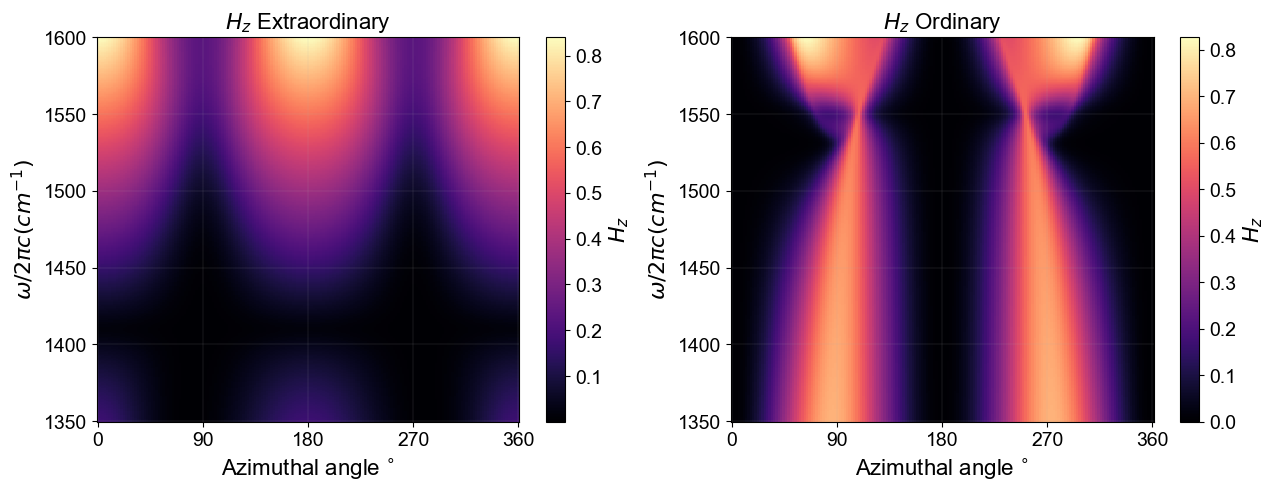

In [24]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ Extraordinary')
axs[1].set_title(f'$H_z$ Ordinary')


plt.show()

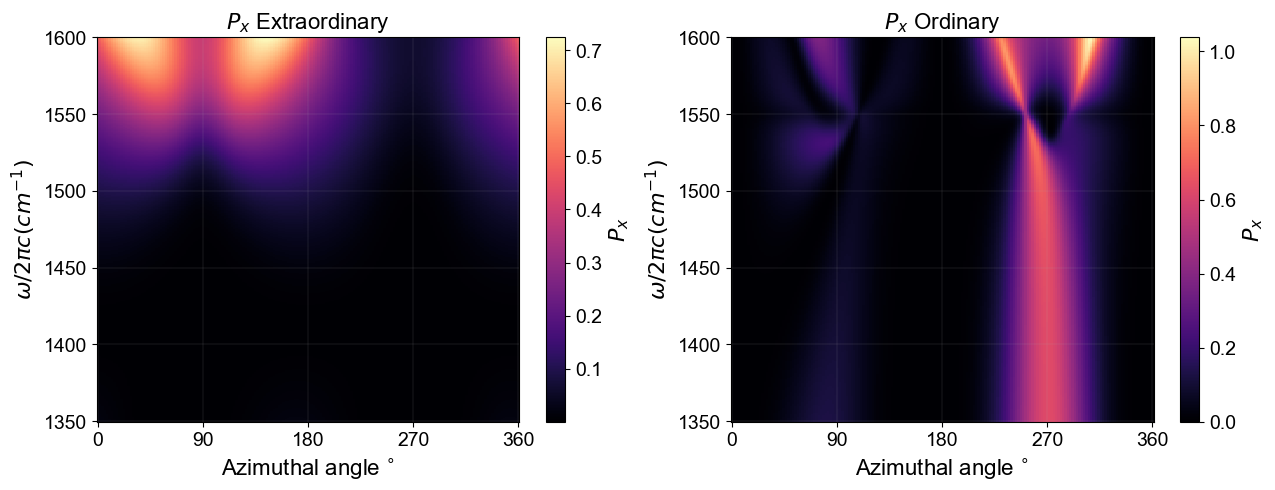

In [25]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ Extraordinary')
axs[1].set_title(f'$P_x$ Ordinary')


plt.show()

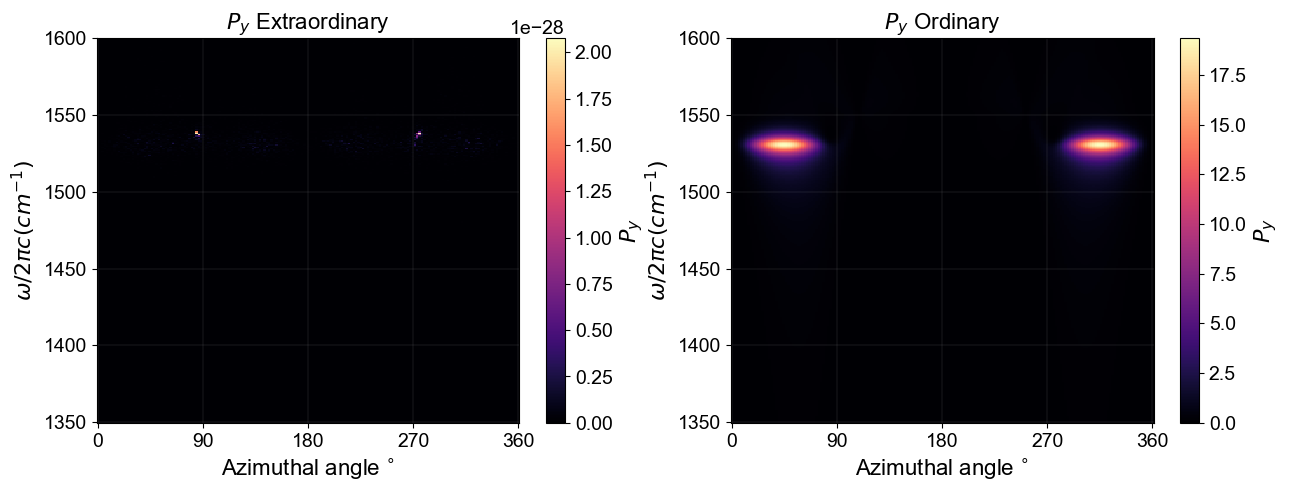

In [26]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ Extraordinary')
axs[1].set_title(f'$P_y$ Ordinary')


plt.show()

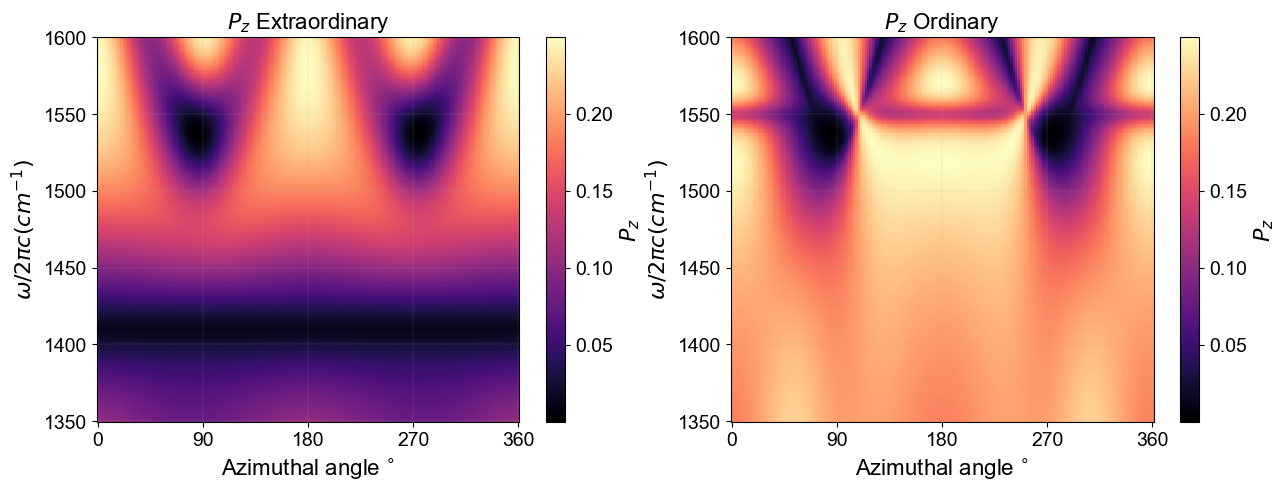

In [27]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Extraordinary')
axs[1].set_title(f'$P_z$ Ordinary')


plt.show()

# Dispersion

In [28]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 873,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 11.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Calcite",
        "rotationX": 0,
        "rotationY": 66.7,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [29]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

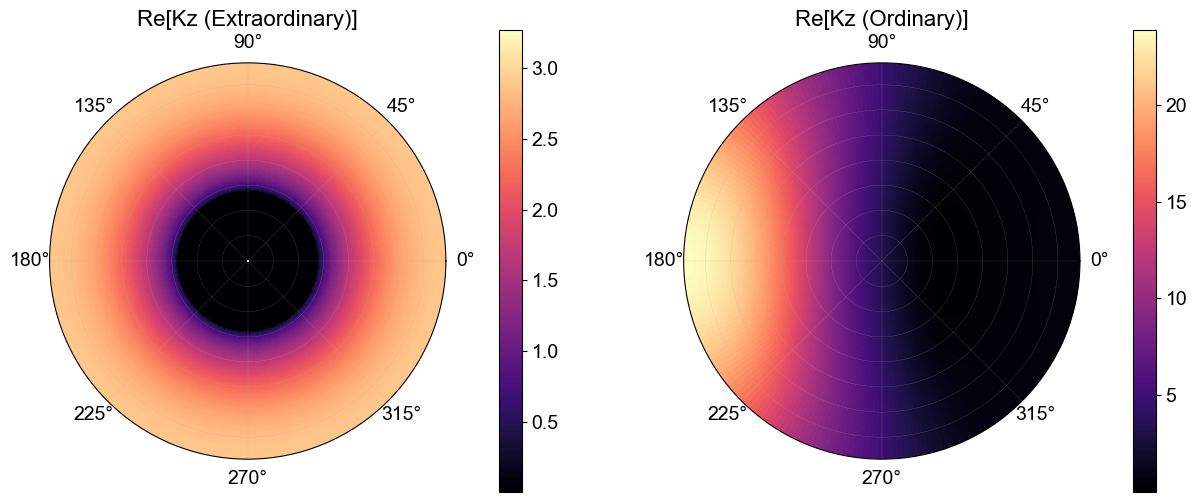

In [30]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Extraordinary)]')
axs[1].set_title('Re[Kz (Ordinary)]')
plt.show()

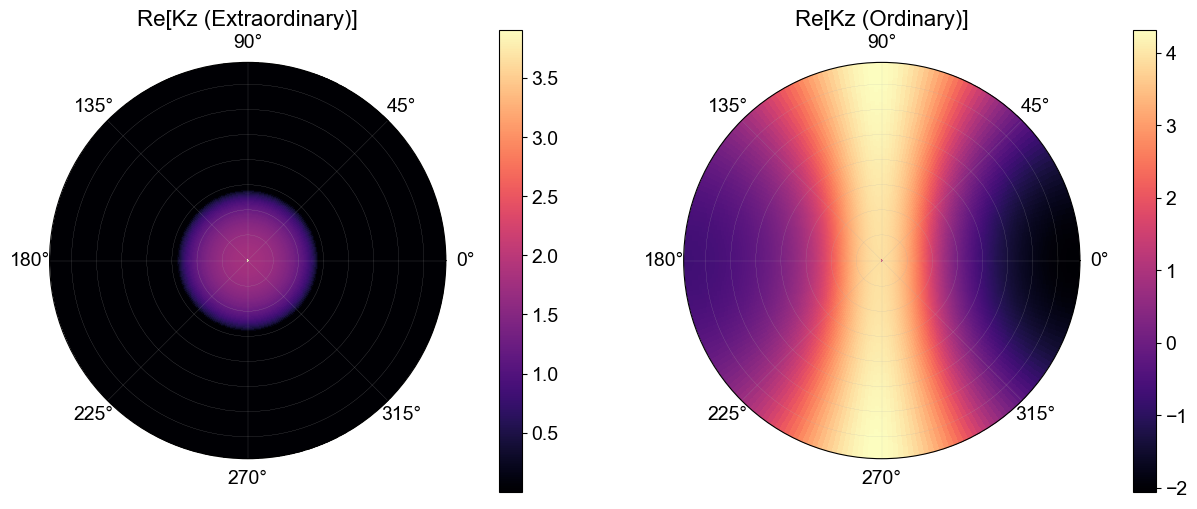

In [31]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Extraordinary)]')
axs[1].set_title('Re[Kz (Ordinary)]')
plt.show()

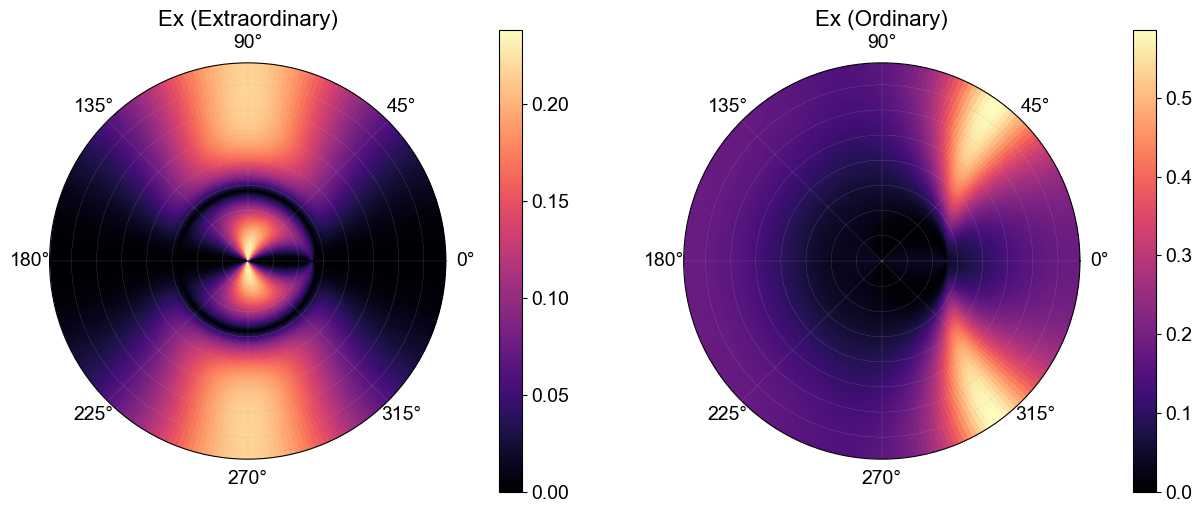

In [32]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ex (Extraordinary)')
axs[1].set_title('Ex (Ordinary)')
plt.show()

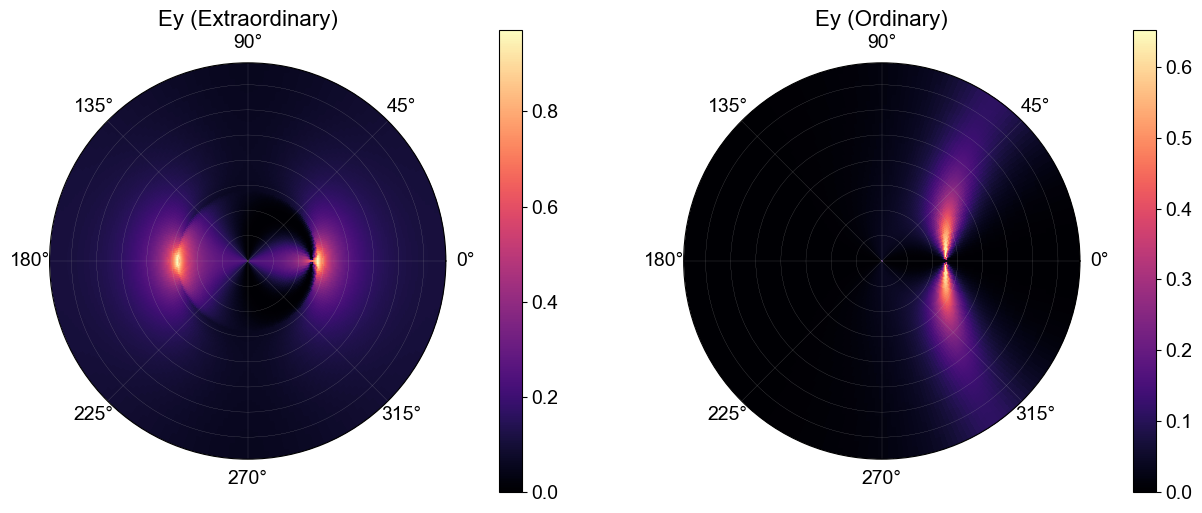

In [33]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ey (Extraordinary)')
axs[1].set_title('Ey (Ordinary)')
plt.show()

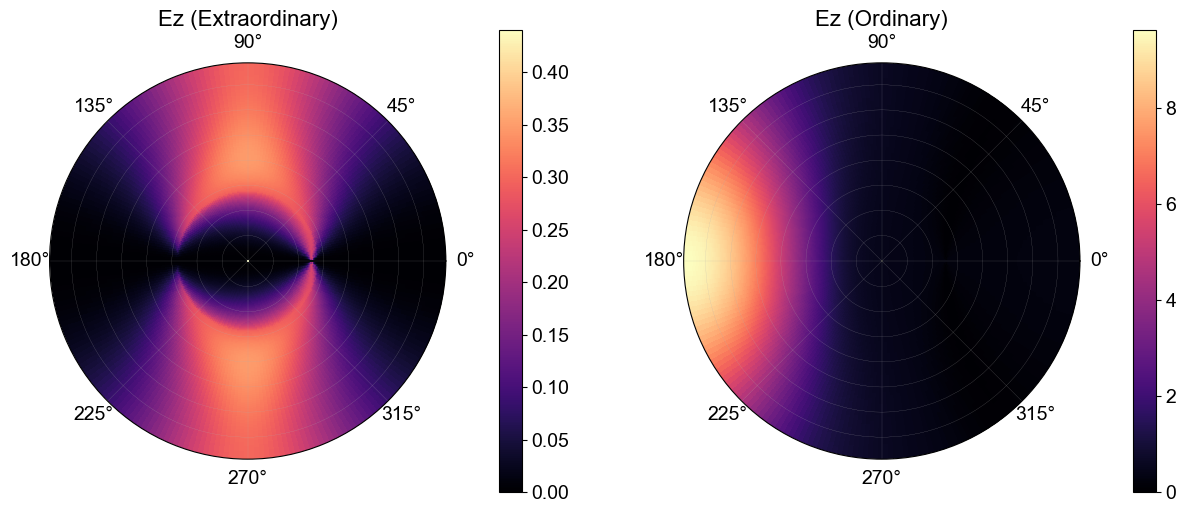

In [34]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Ez (Extraordinary)')
axs[1].set_title('Ez (Ordinary)')
plt.show()

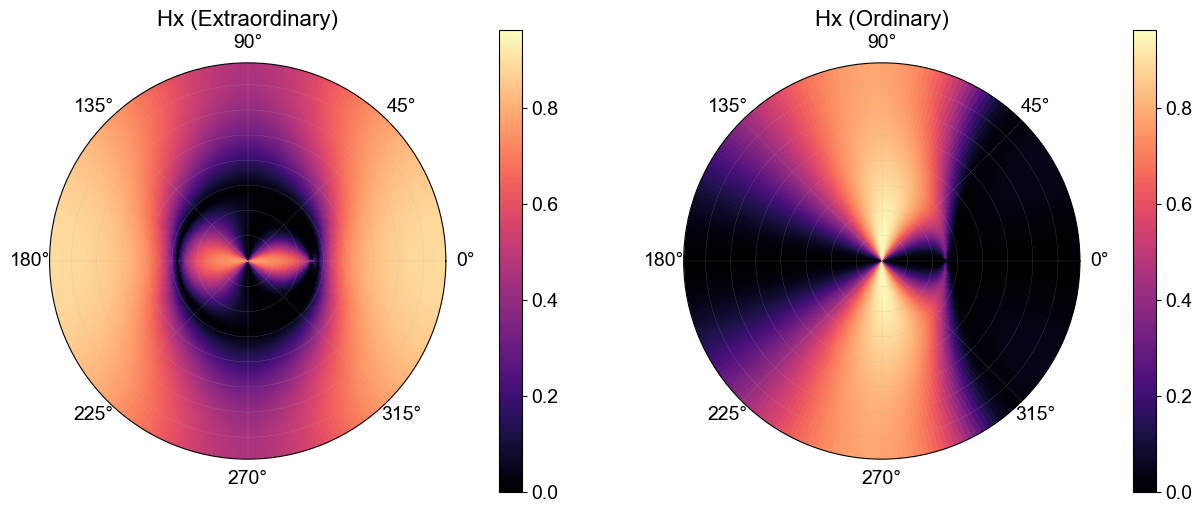

In [35]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hx (Extraordinary)')
axs[1].set_title('Hx (Ordinary)')
plt.show()

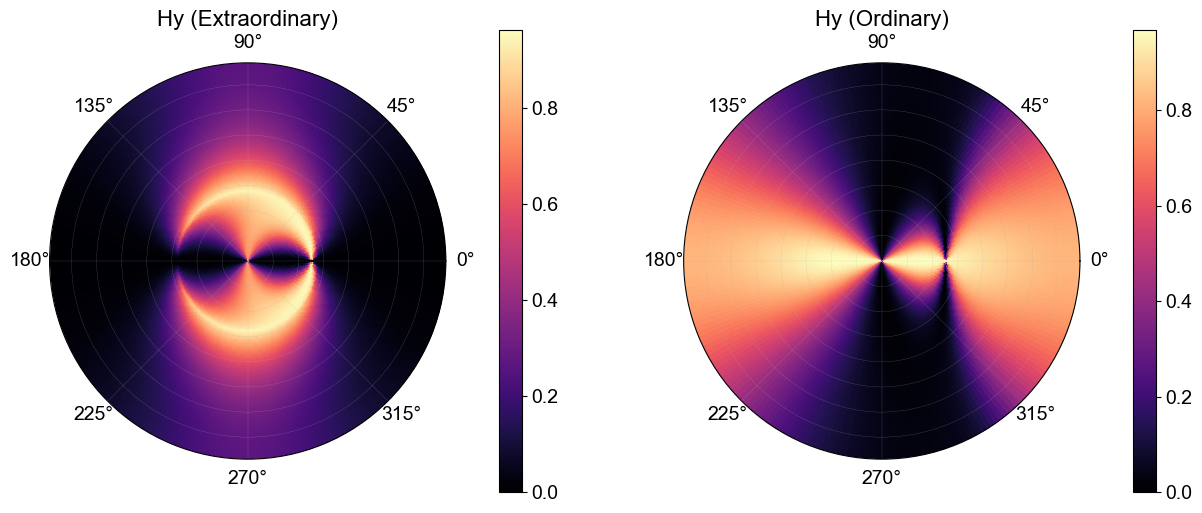

In [36]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hy (Extraordinary)')
axs[1].set_title('Hy (Ordinary)')
plt.show()

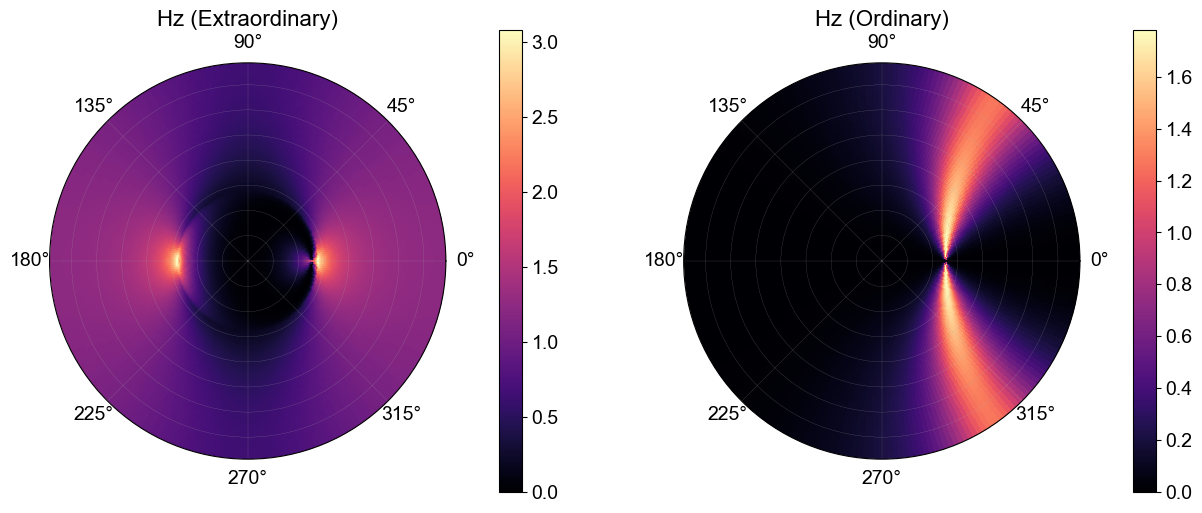

In [37]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Hz (Extraordinary)')
axs[1].set_title('Hz (Ordinary)')
plt.show()

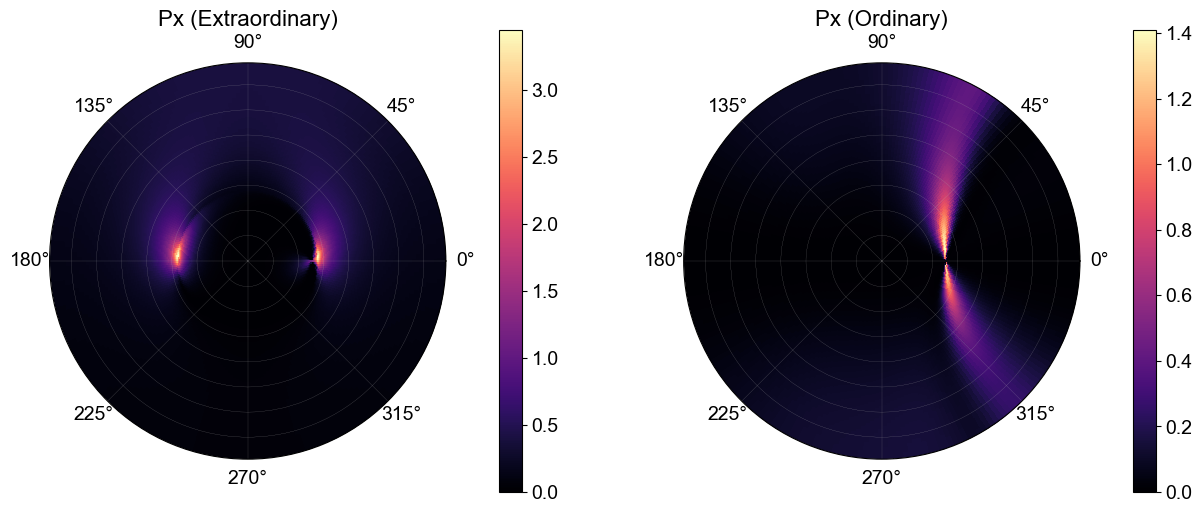

In [38]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Px (Extraordinary)')
axs[1].set_title('Px (Ordinary)')
plt.show()

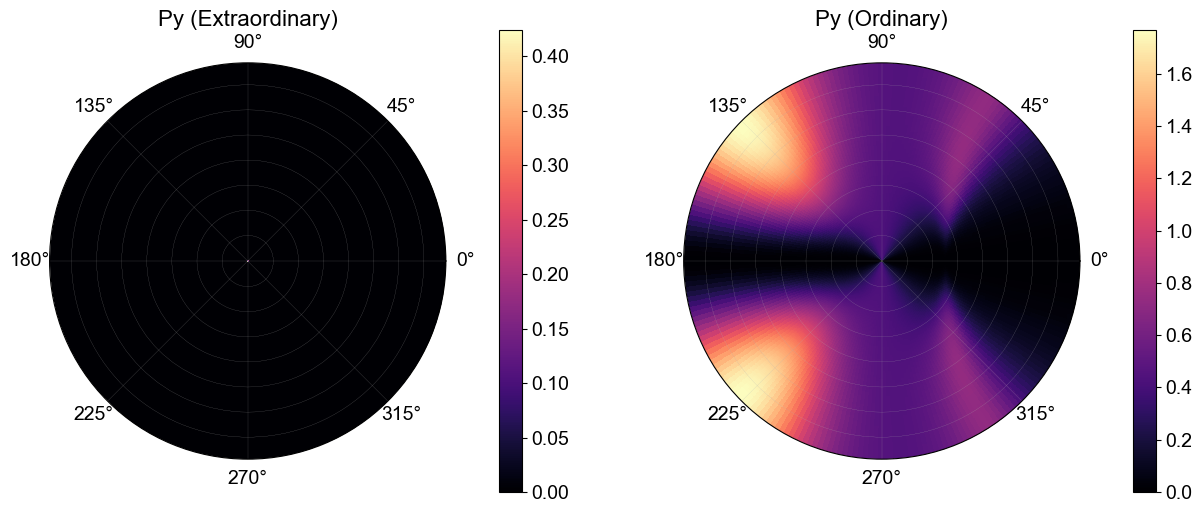

In [39]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Py (Extraordinary)')
axs[1].set_title('Py (Ordinary)')
plt.show()

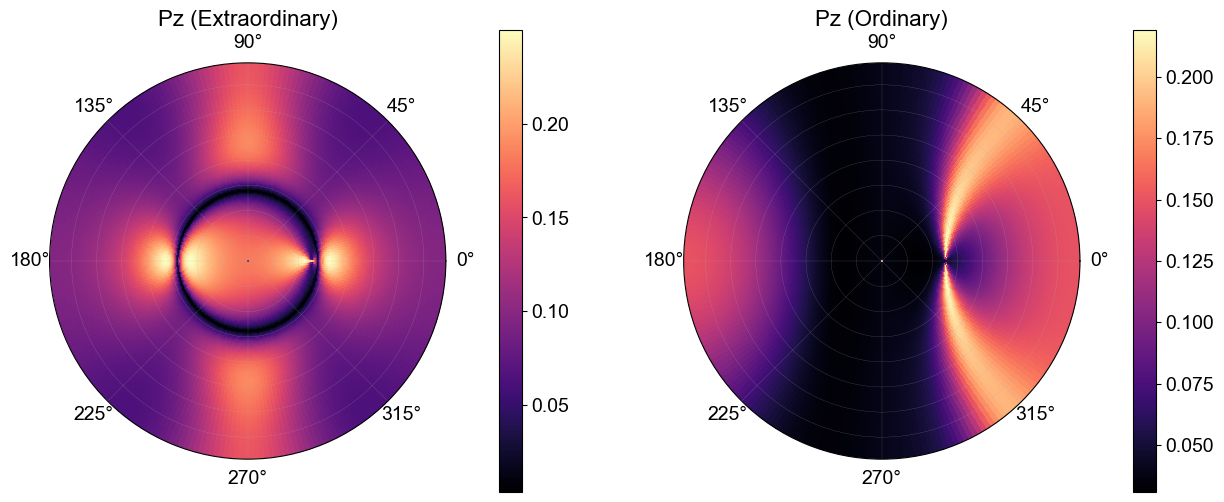

In [40]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Pz (Extraordinary)')
axs[1].set_title('Pz (Ordinary)')
plt.show()